In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Sapharath Vanitchtunyasub ID: 6110422046

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
n = 40428967
sample_size = 200000
skip_values = sorted(random.sample(range(1,n), n-sample_size))


df = pd.read_csv('/content/gdrive/My Drive/train.csv',
                 skiprows = skip_values,
                 nrows=sample_size
                )

# Exploratory Data Analysis

In [ ]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1016149303979082490,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,39947756,2347f47a,cef3e649,b6d4d558,829d9a05,9735f427,1,3,17163,320,50,1955,3,163,100191,71
1,10164197238971868807,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,9c475e75,93e4df35,ffe69079,1,0,20634,320,50,2374,3,39,-1,23
2,10173583813706565096,0,14102100,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,e2ff20da,0d2b4db4,1,0,19015,300,250,2162,2,39,-1,33
3,10193420035697339612,1,14102100,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,ce8180a1,84ebbcd4,1,0,17753,320,50,1993,2,1063,-1,33
4,10200040028247656965,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a4d168b3,8a4875bd,1,0,15705,320,50,1722,0,35,100084,79


In [ ]:
df.shape

(200000, 24)

In [ ]:
df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,2.000000e+05,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000
mean,9.218081e+18,0.169135,1.410256e+07,1004.969350,0.288785,1.015935,0.331750,18827.827055,318.819780,60.086570,2111.077335,1.427740,228.667770,53271.442070,83.52411
std,5.331558e+18,0.374872,2.963766e+02,1.099144,0.507996,0.528765,0.853801,4980.542577,20.691162,47.029284,611.578026,1.325808,352.505948,49953.538946,70.40739
min,3.992732e+14,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.00000
25%,4.602054e+18,0.000000,1.410230e+07,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.00000
50%,9.204334e+18,0.000000,1.410260e+07,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.00000
75%,1.383797e+19,0.000000,1.410281e+07,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100094.000000,104.00000
max,1.844647e+19,1.000000,1.410302e+07,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
id                  200000 non-null uint64
click               200000 non-null int64
hour                200000 non-null int64
C1                  200000 non-null int64
banner_pos          200000 non-null int64
site_id             200000 non-null object
site_domain         200000 non-null object
site_category       200000 non-null object
app_id              200000 non-null object
app_domain          200000 non-null object
app_category        200000 non-null object
device_id           200000 non-null object
device_ip           200000 non-null object
device_model        200000 non-null object
device_type         200000 non-null int64
device_conn_type    200000 non-null int64
C14                 200000 non-null int64
C15                 200000 non-null int64
C16                 200000 non-null int64
C17                 200000 non-null int64
C18                 200000 non-null int

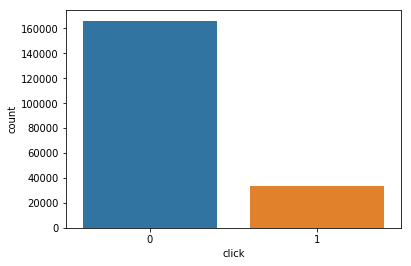

In [ ]:
sns.countplot(x='click', data=df)

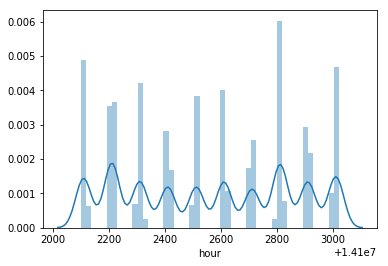

In [ ]:
sns.distplot(df['hour'])

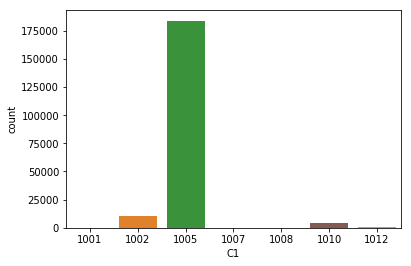

In [ ]:
sns.countplot(x='C1', data=df)

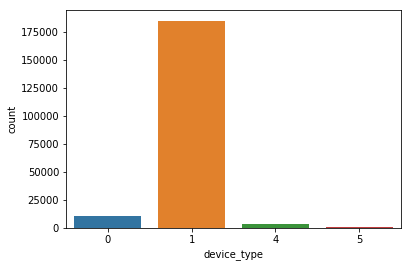

In [ ]:
sns.countplot(df['device_type'], data=df)

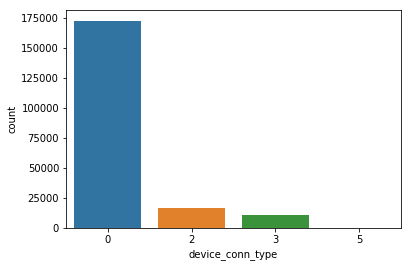

In [ ]:
sns.countplot(df['device_conn_type'], data=df)

**Label Encoder**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
cv=df.dtypes.loc[df.dtypes=='object'].index
print(cv)

Index(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model'],
      dtype='object')


In [ ]:
for i in cv:
    df[i]=label_encoder.fit_transform(df[i])

In [ ]:
df['id'] = label_encoder.fit_transform(df['id'])

In [ ]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,11129,0,14102100,1005,0,946,1318,5,390,13,18,23543,73065,2252,1,3,17163,320,50,1955,3,163,100191,71
1,110212,0,14102100,1005,0,946,1318,5,1574,36,3,20069,82713,3767,1,0,20634,320,50,2374,3,39,-1,23
2,110326,0,14102100,1005,0,677,808,3,1651,47,0,21797,127185,201,1,0,19015,300,250,2162,2,39,-1,33
3,110532,1,14102100,1005,1,1526,1038,17,1651,47,0,21797,115581,1993,1,0,17753,320,50,1993,2,1063,-1,33
4,110597,0,14102100,1005,0,221,1611,1,1651,47,0,21797,92188,2062,1,0,15705,320,50,1722,0,35,100084,79


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
id                  200000 non-null int64
click               200000 non-null int64
hour                200000 non-null int64
C1                  200000 non-null int64
banner_pos          200000 non-null int64
site_id             200000 non-null int64
site_domain         200000 non-null int64
site_category       200000 non-null int64
app_id              200000 non-null int64
app_domain          200000 non-null int64
app_category        200000 non-null int64
device_id           200000 non-null int64
device_ip           200000 non-null int64
device_model        200000 non-null int64
device_type         200000 non-null int64
device_conn_type    200000 non-null int64
C14                 200000 non-null int64
C15                 200000 non-null int64
C16                 200000 non-null int64
C17                 200000 non-null int64
C18                 200000 non-null int64
C19    

# Random Forest Classification

In [ ]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['id','click','site_id', 'app_id', 'device_id', 'device_ip'], axis=1)
X.shape

(200000, 18)

In [ ]:
y = df['click']
y.shape

(200000,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
clf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

**Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_test, y_pred)

0.8035833333333333

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     49873
           1       0.34      0.17      0.23     10127

    accuracy                           0.80     60000
   macro avg       0.59      0.55      0.56     60000
weighted avg       0.76      0.80      0.78     60000



**Find Feature Importance**

In [ ]:
for feature in zip(X.columns, clf.feature_importances_):
    print(feature)

('hour', 0.35736931777378234)
('C1', 0.0028576650248517896)
('banner_pos', 0.006551022610427872)
('site_domain', 0.0552972666685725)
('site_category', 0.013110587728550482)
('app_domain', 0.011167458900714973)
('app_category', 0.01183040604552435)
('device_model', 0.2918470988333833)
('device_type', 0.0025307355144878517)
('device_conn_type', 0.011556045442368367)
('C14', 0.09451953802113115)
('C15', 0.00622478261696265)
('C16', 0.01053320441783856)
('C17', 0.023839207279801034)
('C18', 0.0076078746876731855)
('C19', 0.016198504492335748)
('C20', 0.057994852089118046)
('C21', 0.01896443185247581)


In [ ]:
sfm = SelectFromModel(clf, threshold=0.05)

In [ ]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
       

In [ ]:
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

hour
site_domain
device_model
C14
C20


In [ ]:
X_imp_train = sfm.transform(X_train)
X_imp_test = sfm.transform(X_test)

# Random Forest Classification after selected Feature Importance

In [ ]:
clf_imp = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

In [ ]:
clf_imp.fit(X_imp_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_imp_pred = clf_imp.predict(X_imp_test)

**Model Performance**

In [ ]:
accuracy_score(y_test, y_imp_pred)

0.8054833333333333

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     49873
           1       0.34      0.17      0.23     10127

    accuracy                           0.80     60000
   macro avg       0.59      0.55      0.56     60000
weighted avg       0.76      0.80      0.78     60000



# Undersampling

In [ ]:
df['click'].value_counts()

0    166173
1     33827
Name: click, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=0)

In [ ]:
rus.fit(X, y)

RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')

In [ ]:
X_resample, y_resample = rus.fit_sample(X, y)

In [ ]:
from collections import Counter
print('Random undersampling {}'.format(Counter(y_resample)))

Random undersampling Counter({0: 33827, 1: 33827})


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [ ]:
clf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

**Model Performance**

In [ ]:
accuracy_score(y_test, y_pred)

0.6236389614228703

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62     10164
           1       0.62      0.63      0.63     10133

    accuracy                           0.62     20297
   macro avg       0.62      0.62      0.62     20297
weighted avg       0.62      0.62      0.62     20297



# Result

              For this model, I sampled the data 200,000 samples from 40M records and used Random Forest Classification model for classified the data, I split the dataset to train/test by setting test set 0.3. 
              Model Performance from Random Forest Classification model
              - The accuracy score = 80.62%, 
              - Classification report, the accuracy around 81%, precision and recall from class non-click is ok that is better than class click
              
              After that, I tried to find feature importance from Random Forest Classification and used SelectFromModel to select the features that feature_importance value is more than a threshold that I set so I got 5 features like hour, site_domain, device_model, C14, C20 and put this feature in Random Forest model again.
              
              Model Performance after select feature importance
              - The accuracy score = 80.82%
              - Classification report, the accuracy around 81%, precision and recall from class non-click is ok that is better than class click
              
              
              From countplot of the number of clicks, the graph shows that the number of non-click is more than click around 120,000 records with this reason precision/recall of class click from classification report is lower than class non-click because it is imbalance class.
              
              Because of imbalance class, I used undersampling techniques for solve this problem and train/test model again.
              Model Performance after undersampling
              - The accuracy score = 62.36%
              - Classification report, the accuracy around 62%, precision and recall from class non-click is close to class click
              